## Multiple axes using subplots

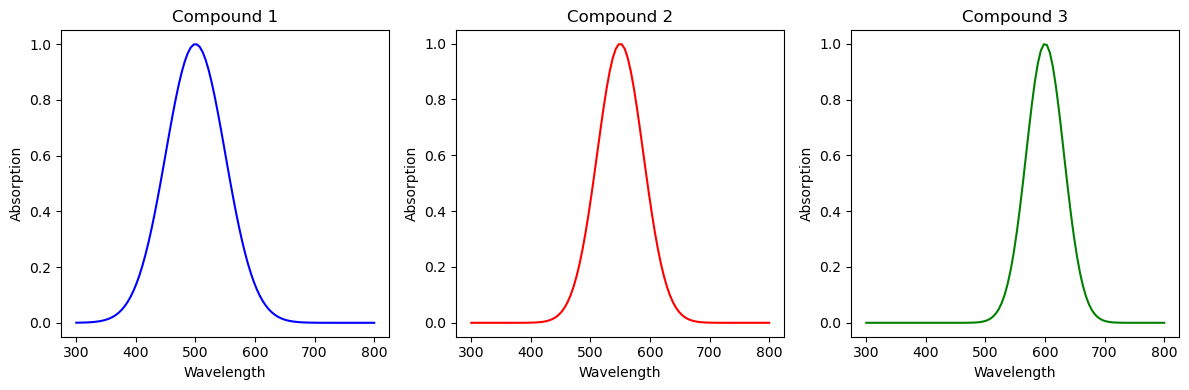

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated absorption spectra for three chemical compounds
wavelengths = np.linspace(300, 800, 100)
compound1_absorption = np.exp(-(wavelengths - 500) ** 2 / 5000)
compound2_absorption = np.exp(-(wavelengths - 550) ** 2 / 3000)
compound3_absorption = np.exp(-(wavelengths - 600) ** 2 / 2000)

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plotting absorption spectra on individual axes
axs[0].plot(wavelengths, compound1_absorption, color='blue')
axs[0].set_title('Compound 1')
axs[0].set_xlabel('Wavelength')
axs[0].set_ylabel('Absorption')

axs[1].plot(wavelengths, compound2_absorption, color='red')
axs[1].set_title('Compound 2')
axs[1].set_xlabel('Wavelength')
axs[1].set_ylabel('Absorption')

axs[2].plot(wavelengths, compound3_absorption, color='green')
axs[2].set_title('Compound 3')
axs[2].set_xlabel('Wavelength')
axs[2].set_ylabel('Absorption')

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [7]:
plot_folder = "/Users/tjams20/Documents/repos/DoE_Course_Material/Figures/"

## 3D plotting

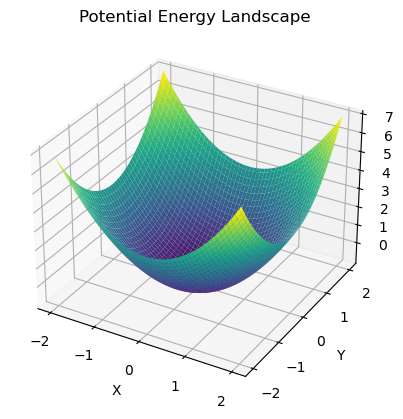

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate x, y coordinates
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calculate potential energy values
Z = -1 + X**2 + Y**2

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the potential energy landscape
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adding labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential Energy')
ax.set_title('Potential Energy Landscape')

# Displaying the plot
plt.show()
fig.savefig(plot_folder + "3D_PES.png")

## Advanced customisation

/var/folders/zm/15gkjw2s5252k3d732r9xt2h0000gn/T/ipykernel_62711/2893282383.py:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


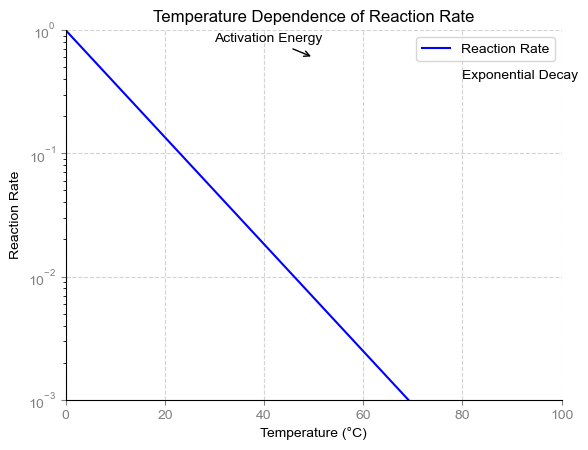

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
temperature = np.linspace(0, 100, 100)
reaction_rate = np.exp(-0.1 * temperature)  # Example reaction rate data

# Create a figure and axis objects
fig, ax = plt.subplots()

# Plot the reaction rate
ax.plot(temperature, reaction_rate, 'b-', label='Reaction Rate')

# Customize the plot
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Reaction Rate')
ax.set_title('Temperature Dependence of Reaction Rate')
ax.legend(loc='upper right')

# Add annotations and text
ax.annotate('Activation Energy', xy=(50, 0.6), xytext=(30, 0.8),
            arrowprops=dict(arrowstyle='->'))
ax.text(80, 0.4, 'Exponential Decay')

# Adjust axis scales and limits
ax.set_yscale('log')
ax.set_xlim(0, 100)
ax.set_ylim(1e-3, 1)

# Customize colors and color map
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_tick_params(color='gray')
ax.yaxis.set_tick_params(color='gray')
ax.tick_params(axis='both', colors='gray')

# Apply visual style and theme
plt.style.use('seaborn')
plt.grid(True, linestyle='--', color='lightgray')

# Show the plot
plt.show()
fig.savefig(plot_folder + "adv_cust.png")

## Animations

/var/folders/zm/15gkjw2s5252k3d732r9xt2h0000gn/T/ipykernel_62711/133871012.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


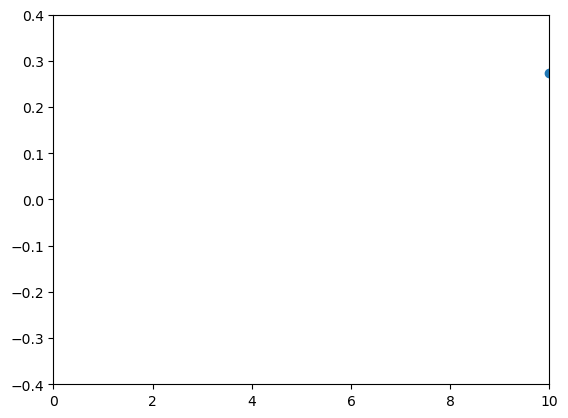

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate sample data for molecular vibration
time = np.linspace(0, 10, 100)
amplitude = 0.3
frequency = 2.0
vibration = amplitude * np.sin(frequency * time)

# Set up the figure and axis
fig, ax = plt.subplots()

# Initialize an empty line
line, = ax.plot([], [], 'o-', lw=2)

# Set plot limits
ax.set_xlim(0, 10)
ax.set_ylim(-0.4, 0.4)

# Define initialization function
def init():
    line.set_data([], [])
    return line,

# Define animation update function
def update(frame):
    x = time[frame]
    y = vibration[frame]
    line.set_data(x, y)
    return line,

# Create the animation
animation = FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True)

# Display the animation
HTML(animation.to_jshtml())


MovieWriter imagemagick unavailable; using Pillow instead.


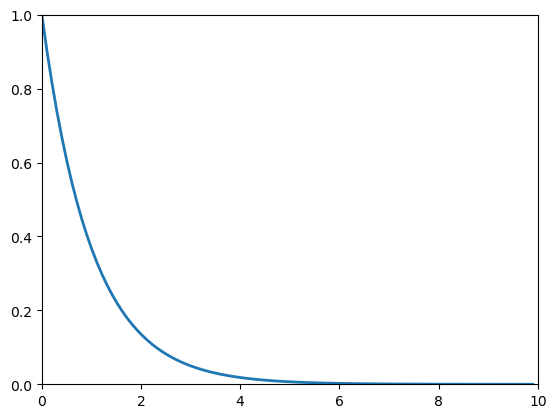

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate sample data
time = np.linspace(0, 10, 100)
concentration_A = np.exp(-time)
concentration_B = 1 - concentration_A

# Create a figure and axis objects
fig, ax = plt.subplots()

# Create initial empty plot
line, = ax.plot([], [], lw=2)

# Set plot limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 1)

# Define initialization function
def init():
    line.set_data([], [])
    return line,

# Define animation update function
def update(frame):
    line.set_data(time[:frame], concentration_A[:frame])
    return line,

# Create animation
animation = FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True)

# Save the animation as a GIF
animation.save(plot_folder + 'output.gif', writer='imagemagick')
